In [64]:
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [65]:
# Carregando DataSet 
df = pd.read_csv('dados/dataset.csv')

In [66]:
df.shape

(11000, 12)

In [67]:
df.head()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1
3,4,B,Aviao,3,3,176,4,media,M,10,1177,1
4,5,C,Aviao,2,2,184,3,media,F,46,2484,1


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       11000 non-null  int64 
 1   corredor_armazem         11000 non-null  object
 2   modo_envio               11000 non-null  object
 3   numero_chamadas_cliente  11000 non-null  int64 
 4   avaliacao_cliente        11000 non-null  int64 
 5   custo_produto            11000 non-null  int64 
 6   compras_anteriores       11000 non-null  int64 
 7   prioridade_produto       11000 non-null  object
 8   genero                   11000 non-null  object
 9   desconto                 11000 non-null  int64 
 10  peso_gramas              11000 non-null  int64 
 11  entregue_no_prazo        11000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [69]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [70]:
cats = ['corredor_armazem', 'modo_envio', 'prioridade_produto', 'genero']

In [71]:
nums = ['numero_chamadas_cliente', 'avaliacao_cliente', 'custo_produto', 'compras_anteriores', 
        'desconto', 'peso_gramas']

In [72]:
target = ['entregue_no_prazo'] # Variável alvo

In [73]:
df[nums].describe()

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,4.054455,2.990455,210.200909,3.567727,13.372545,3633.844455
std,1.141438,1.413570,48.062985,1.522852,16.204943,1635.402722
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000


In [74]:
df[cats].describe()

,corredor_armazem,modo_envio,prioridade_produto,genero
count,11000,11000,11000,11000
unique,5,3,3,2
top,F,Navio,baixa,F
freq,3666,7463,5298,5546


In [75]:
df[target].value_counts()

entregue_no_prazo
1                    6563
0                    4437
Name: count, dtype: int64

### Limpeza de Dados

In [76]:
df.isna().sum()

ID                         0
corredor_armazem           0
modo_envio                 0
numero_chamadas_cliente    0
avaliacao_cliente          0
custo_produto              0
compras_anteriores         0
prioridade_produto         0
genero                     0
desconto                   0
peso_gramas                0
entregue_no_prazo          0
dtype: int64

## Valores Duplicados

In [77]:
df.duplicated().sum()

0

## Tratamento de Valores Outliers 

In [78]:
print(f"Número de linhas antes de filtar valores extremos (Outliers): {len(df)}")

Número de linhas antes de filtar valores extremos (Outliers): 11000


In [79]:
df[nums].head()

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
0,4,2,177,3,44,1233
1,4,5,216,2,59,3088
2,2,2,183,4,48,3374
3,3,3,176,4,10,1177
4,2,2,184,3,46,2484


In [80]:
# Aplicar o conceito a uma única variável

df.desconto.mean()

13.372545454545454

In [81]:
df.desconto.std() #Desvio padrão - distância da média

16.20494287359407

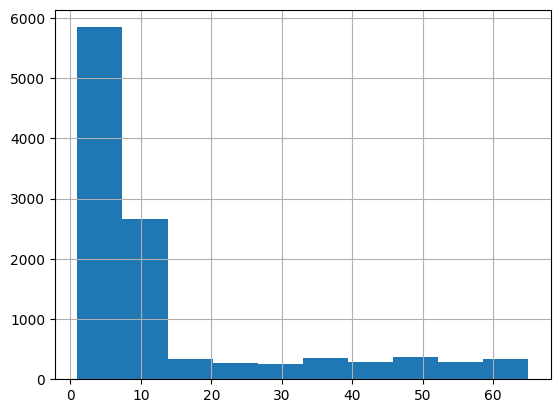

In [82]:
df.desconto.hist();

In [83]:
# Calcula os limites superior e inferior 
# Um valor OUTLIER é aquele que está abaixo do limite inferior ou acima do lim superior

limite_superior = df.desconto.mean() + 3 * df.desconto.std()
print(f"Limite Superior: {limite_superior}")

limite_inferior = df.desconto.mean() - 3 * df.desconto.std()
print(f"Limite Inferior: {limite_inferior}")

Limite Superior: 61.987374075327665
Limite Inferior: -35.24228316623676


In [84]:
# Extrai os registros com outliers na coluna desconto

df_outliers_desconto = df[(df.desconto <= limite_inferior) | (df.desconto >= limite_superior)]
df_outliers_desconto

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
36,37,D,Navio,3,5,137,4,alta,F,62,1477,1
60,61,D,Navio,3,1,221,3,baixa,F,64,2794,1
62,63,A,Navio,5,1,105,6,media,M,62,1292,1
111,112,B,Caminhao,4,2,239,3,baixa,F,65,3679,1
122,123,A,Caminhao,4,2,160,3,baixa,M,64,1714,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3005,3006,F,Caminhao,5,2,159,3,media,F,63,1675,1
3017,3018,F,Aviao,4,1,235,2,alta,M,64,2107,1
3040,3041,C,Navio,3,2,149,3,media,F,64,1920,1
3068,3069,A,Navio,4,3,139,3,baixa,M,64,1814,1


In [85]:
# Filtra o dataframe removendo os registros com outliers na coluna desconto
df = df[(df.desconto > limite_inferior) & (df.desconto < limite_superior)]

In [86]:
print(f"Número de linhas depois de filtrar os outliers: {len(df)}")

Número de linhas depois de filtrar os outliers: 10819


### Automatização da verificação dos OUTLIERS e exclusão desses

In [87]:
#Criando array np True do tamanho do datafrmae
registros = np.array([True] * len(df)) 
type(registros)

numpy.ndarray

In [88]:
# Verificando valores True no array
np.count_nonzero(registros == True)

10819

In [89]:
np.count_nonzero(registros == False)

0

In [90]:
df[nums].columns

Index(['numero_chamadas_cliente', 'avaliacao_cliente', 'custo_produto',
       'compras_anteriores', 'desconto', 'peso_gramas'],
      dtype='object')

In [91]:
# Variáveis numpericas (Sem a variável desconto)
nums2 = ['numero_chamadas_cliente',
        'avaliacao_cliente',
        'compras_anteriores',
        'custo_produto',
        'peso_gramas']

In [92]:
# Loop por cada variável numérica 
for col in nums2:
    
    # Calcula o z-score absoluto
    zscore = abs(stats.zscore(df[col]))
    
    # Mantém valores com menos de 3 z-score absoluto
    registros = (zscore < 3) & registros

In [93]:
np.count_nonzero(registros == True)

10643

In [94]:
np.count_nonzero(registros == False)

176

In [95]:
# Removemos os registros com o z-score abaixo de 3 nas colunas numéricas
df = df[registros]

In [96]:
print(f"Número de linhas após filtrar valores extremos (OUTLIERS): {len(df)}")

Número de linhas após filtrar valores extremos (OUTLIERS): 10643


## Tratamento de Desbalanceamento de Classes

In [97]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [98]:
df[target].value_counts()

entregue_no_prazo
1                    6282
0                    4361
Name: count, dtype: int64

## Engenharia de Atributos

### FEATURE SELECTION

In [99]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [100]:
df.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
2769,2770,B,Navio,3,3,178,3,alta,M,43,1517,1
8088,8089,D,Aviao,3,2,262,2,media,M,4,5738,0
6066,6067,D,Navio,5,1,267,4,baixa,M,5,4440,1
5981,5982,F,Navio,4,2,170,6,media,M,10,4891,0
5124,5125,D,Navio,3,3,154,2,media,F,1,5746,1


In [101]:
df[nums].corr()

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
numero_chamadas_cliente,1.000000,0.013398,0.328148,0.246604,-0.132172,-0.285186
avaliacao_cliente,0.013398,1.000000,0.006332,0.004893,0.000551,-0.004440
custo_produto,0.328148,0.006332,1.000000,0.163395,-0.137703,-0.146885
compras_anteriores,0.246604,0.004893,0.163395,1.000000,-0.106093,-0.235066
desconto,-0.132172,0.000551,-0.137703,-0.106093,1.000000,-0.365062
peso_gramas,-0.285186,-0.004440,-0.146885,-0.235066,-0.365062,1.000000


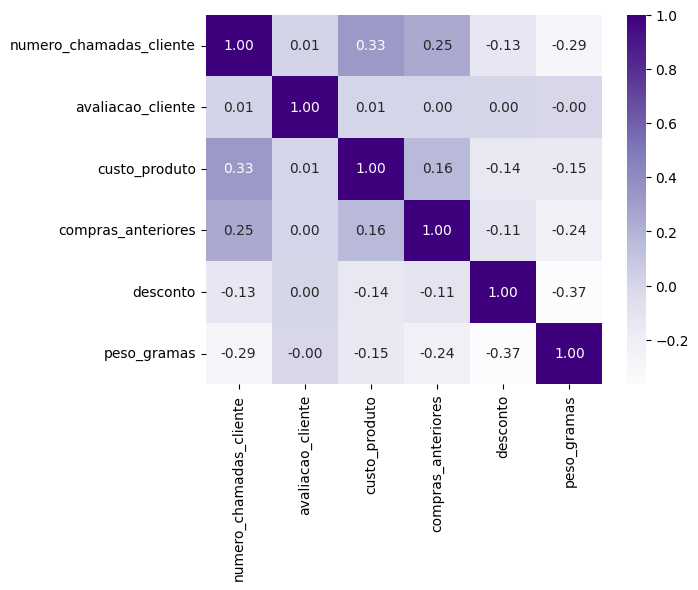

In [104]:
# Mapa gráfico
sns.heatmap(df[nums].corr(), cmap = 'Purples', annot = True, fmt = '.2f');

**Decisão**: Os recursos que ultrapassaram o lim (+/- 0,05) com a variável alvo (entregue_no_prazo) serão escolhidos
A variável avalicao cliente não será utizada, bem como ID por não apresentar info util

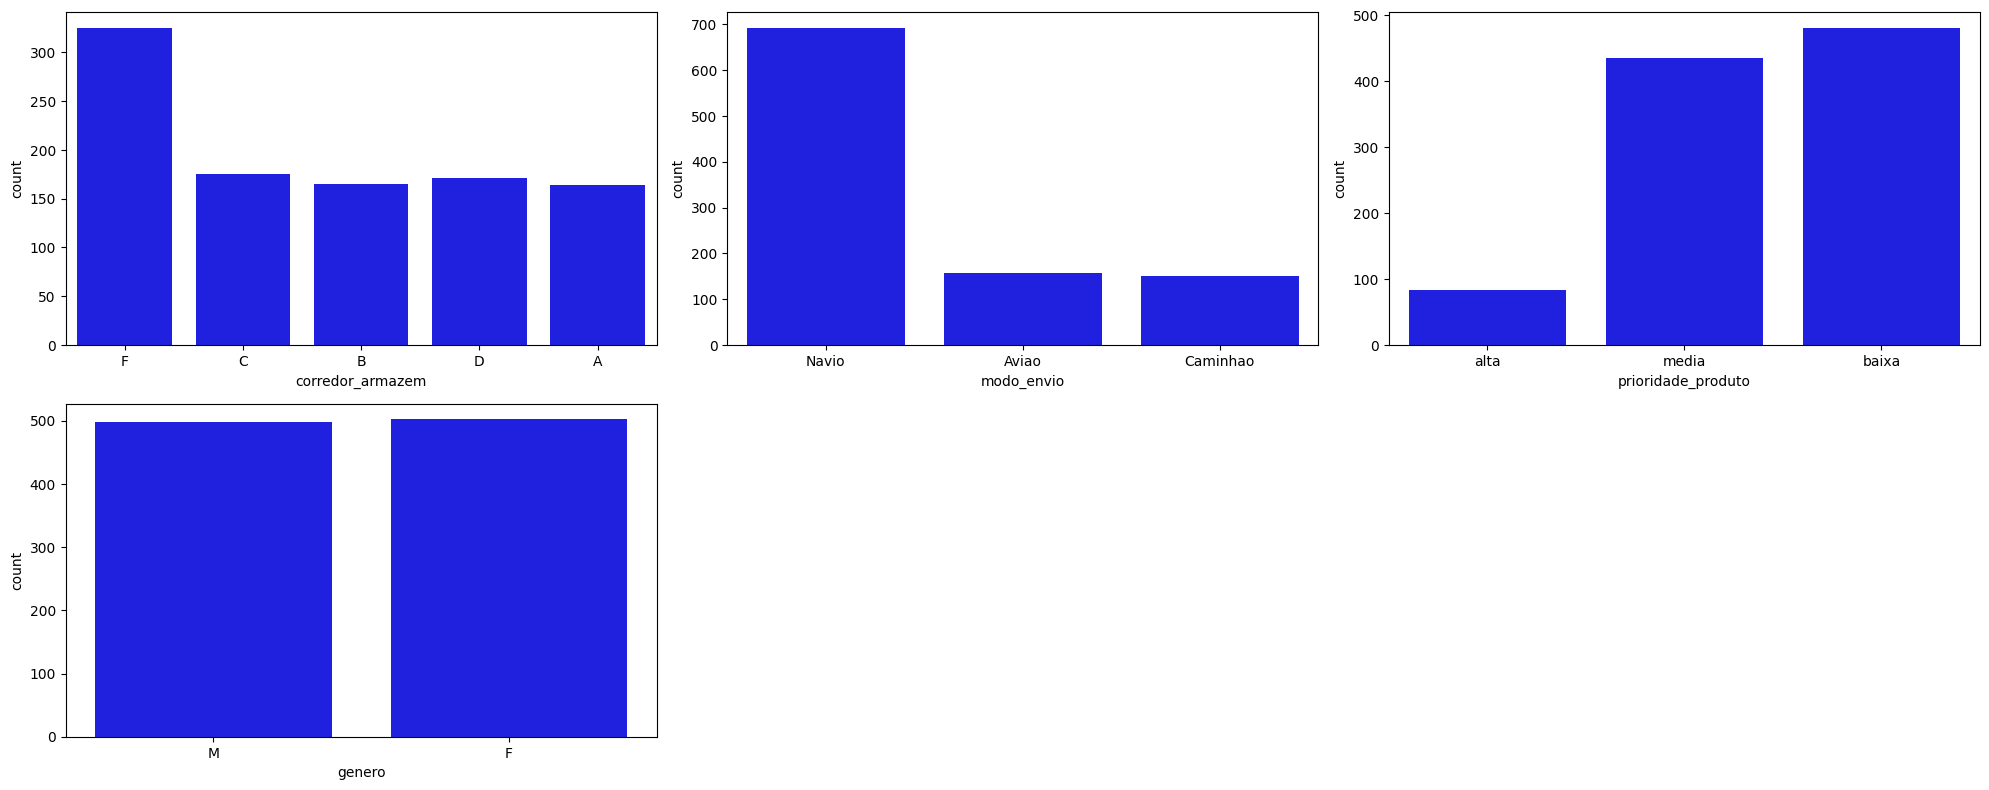

In [109]:
# Verificando para variáveis categóricas
df_sample = df.sample(1000, random_state =42)
plt.figure(figsize = (20,8))
for i in range(0, len(cats)):
    plt.subplot(2,3,i+1)
    sns.countplot(x=df_sample[cats[i]], color = 'blue', orient = 'v')
    plt.tight_layout()

**Decisão**: A variável de gênero não será considerada, por não gerar impacto, haja vista a euqalidade das proporções